## Importing dataset

In [1]:
import numpy  as np
import matplotlib.pyplot as plt
np.random.seed(0)
import math

In [2]:
# Loading data
train_data = np.loadtxt('./p3_train.csv', delimiter=',',skiprows=1)
test_data = np.loadtxt('./p3_test.csv', delimiter=',',skiprows=1)

In [3]:
# Creating main training and testing dataset so that we can use them later too
X_train_main, Y_train_main = train_data[:,:10], train_data[:,10]
X_test_main, Y_test_main = test_data[:,:10], test_data[:,10]

## 1. Bayes Classifier

In [4]:
classes, features = 5, 10

### For Normal Density

In [5]:
# Creating list having training data of each class with class as index of list 
temp = train_data[:,:]
lst = [] 
for i in range(1,classes+1):
  x = temp[np.where(temp[:,10]==i)]
  x = x[:,:10] # taking 10 features
  lst.append(x)

In [6]:
# assigning training and testing datas to main data
Y_train, Y_test = Y_train_main, Y_test_main
X_train, X_test = X_train_main, X_test_main

In [7]:
mean=[]   # mean for each class
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

In [8]:
variance=[]    # Update Variance in this step
for i in range(classes):
  a=lst[i]-mean[i]
  v = a.T@a/lst[i].shape[0]
  v = np.linalg.inv(v)
  variance.append(v)

In [9]:
variance[1].shape

(10, 10)

In [10]:
X_test.shape

(15000, 10)

#### Training

In [11]:
count = 0
for i in range(X_train.shape[0]):
  g = []                   #  Storing class conditionals of 5 classes
  for j in range(classes):
    v = (X_train[i]-mean[j])
    v=v.reshape((v.shape[0],1))
    k=0.5*v.T@variance[j]@v
    k = math.sqrt(np.linalg.det(variance[j]))*math.exp(-k)
    g.append(k)          #comparing exponent values
    #print(g)
  k = g.index(max(g)) +1
  #print(g)
  if k==Y_train[i]:
    count=count+1

In [12]:
print(f'Accuracy is: {count*100/60000} %')

Accuracy is: 59.37166666666667 %


#### Testing

In [13]:
confusion_matrix = np.zeros((classes,classes))

In [14]:
count = 0
for i in range(X_test.shape[0]):
  g = []                   #  5 classes storing here
  for j in range(classes):
    v = (X_test[i]-mean[j])
    v=v.reshape((v.shape[0],1))
    k=0.5*v.T@variance[j]@v
    k = math.sqrt(np.linalg.det(variance[j]))*math.exp(-k)
    g.append(k) 
  k = g.index(max(g))         
  if k==int(Y_test[i])-1:
    count=count+1
  v = int(Y_test[i])-1
  confusion_matrix[v][k] += 1

In [15]:
print(f'Test Accuracy is: {count*100/15000} %')

Test Accuracy is: 59.38 %


In [16]:
print('testing data confusion matrix is:')
print(confusion_matrix)

testing data confusion matrix is:
[[1627.  362.  264.  344.  374.]
 [ 381. 1744.  277.  267.  312.]
 [ 298.  296. 1914.  241.  291.]
 [ 321.  334.  254. 1794.  272.]
 [ 364.  309.  231.  301. 1828.]]


In [17]:
# function for F1 score

In [18]:
def F1(classes,confusion_matrix):
    TP, TN, FP, FN, F1 = [], [], [], [], []  # True positive True negative False Positive False negative and F values
    for i in range(classes):
      TP.append(confusion_matrix[i][i])
      TN.append(np.sum(confusion_matrix)-np.sum(confusion_matrix[i,:])-np.sum(confusion_matrix[:,i])+confusion_matrix[i][i])
      FP.append(np.sum(confusion_matrix[i,:])-confusion_matrix[i][i])
      FN.append(np.sum(confusion_matrix[:,i])-confusion_matrix[i][i])
      F1.append((2*TP[i])/(2*TP[i] + FP[i] + FN[i]))
    return F1
score = F1(classes,confusion_matrix)

In [19]:
for c in range(classes):
    print(f"F1 Score (Class {c}): {score[c]}")

F1 Score (Class 0): 0.545790003354579
F1 Score (Class 1): 0.5788250912711583
F1 Score (Class 2): 0.640133779264214
F1 Score (Class 3): 0.6058763931104356
F1 Score (Class 4): 0.5983633387888707


### Exp Density

In [20]:
# assigning data for this part
X_train, Y_train = np.absolute(train_data[:,:10]), train_data[:,10]
X_test, Y_test = np.absolute(test_data[:,:10]), test_data[:,10]

In [21]:
temp = train_data[:,:]
lst = []
for i in range(1,classes+1):
  x = temp[np.where(temp[:,10]==i)]
  x = x[:,:10]
  lst.append(x)

In [22]:
# computing Median
median=[]  
for i in range(classes):
  a=lst[i]
  a = np.median(a,axis=0)
  median.append(a)

In [23]:
# Finding Sigma
sigma = []
for i in range(classes):
  s = np.zeros(10)  # 10 is size of features
  for j in range(lst[i].shape[0]):
    x=lst[i]
    s=s+np.absolute(x[j]-median[i])
  s=s/lst[i].shape[0]
  sigma.append(s)

#### Training

In [24]:
count = 0
for i in range(X_train.shape[0]):
  g = []                   #  Storing class conditionals of 5 classes
  for j in range(classes):
    k=0
    s=1
    x = X_train[i]
    for l in range(10): # 10 is number of features
      k=k+abs(x[l]-median[j][l])/sigma[j][l]
      s = s*sigma[j][l]
    k = math.exp(-0.5*k)/s
    g.append(k)
  k = g.index(max(g)) +1
  if k==Y_train[i]:
    count=count+1

In [25]:
print(f'Accuracy is: {count*100/X_train.shape[0]} %')

Accuracy is: 48.78666666666667 %


#### Testing

In [26]:
confusion_matrix = np.zeros((classes,classes))

In [27]:
count = 0
for i in range(X_test.shape[0]):
  g = []                   #  Storing class conditionals of 5 classes
  for j in range(classes):
    k=0
    s=1
    x = X_test[i]
    for l in range(10): # 10 is number of features
      k=k+abs(x[l]-median[j][l])/sigma[j][l]
      s = s*sigma[j][l]
    k = math.exp(-0.5*k)/s
    g.append(k)
  k = g.index(max(g))
  if k==int(Y_test[i])-1:
    count=count+1
  v = int(Y_test[i])-1
  confusion_matrix[v][k] += 1

In [28]:
print(f'Accuracy is: {count*100/15000} %')

Accuracy is: 48.50666666666667 %


In [29]:
print('testing data confusion matrix is:')
print(confusion_matrix)

testing data confusion matrix is:
[[1056.  506.  460.  430.  519.]
 [ 302. 1435.  427.  384.  433.]
 [ 249.  388. 1747.  287.  369.]
 [ 255.  437.  411. 1464.  408.]
 [ 268.  411.  410.  370. 1574.]]


In [30]:
score = F1(classes,confusion_matrix)

In [31]:
for c in range(classes):
    print(f"F1 Score (Class {c}): {score[c]}")

F1 Score (Class 0): 0.41403646343854145
F1 Score (Class 1): 0.46606040922377395
F1 Score (Class 2): 0.5379522709776752
F1 Score (Class 3): 0.4954314720812183
F1 Score (Class 4): 0.49684343434343436


## 2. Multi class using logistic regressor

In [32]:
# assigning training and testing data to main data
Y_train = Y_train_main
Y_test = Y_test_main
X_train = X_train_main
X_test = X_test_main

In [33]:
# making augmented train 
tmp = np.ones((X_train.shape[0],1)) 
X_train=np.column_stack((X_train,tmp))
X_train.shape

(60000, 11)

In [34]:
# making augmented train 
tmp = np.ones((X_test.shape[0],1))
X_test=np.column_stack((X_test,tmp))
X_test.shape

(15000, 11)

### Training

In [35]:
classes, features = 5, 11

In [36]:
# computing Weight for every class
W=[]
for i in range(5):
  W.append(np.ones((features,1)))

In [37]:
def calc_loss(X,W,j):
  X=X.reshape((X.shape[0],1))
  e=[]                        # exponent e
  g = []                      # softmax g
  grad = []                   # gradient grad
  for i in range(classes):
    e.append(math.exp(W[i].T@X))
  k = sum(e)
  for i in range(classes):
    g.append(e[i]/k)
  loss = -1*math.log(g[j])     # loss for single image
  for i in range(classes):
    if i!=j:
      grad.append(-g[i]*X.reshape(X.shape[0]))
    else:
      grad.append((1-g[i])*X.reshape(X.shape[0]))
  return loss,grad

In [38]:
def train_epoch1():
  final_loss = 0
  final_grad = np.zeros((features,classes))  
  for i in range(X_train.shape[0]):
    loss,grad = calc_loss(X_train[i,:],W,int(Y_train[i])-1)    
    final_loss =final_loss + loss
    final_grad = final_grad + np.stack(grad,axis = 1)
  return final_loss,final_grad

In [39]:
epochs, alpha, prev_loss = 10, 10, 0
for i in range(epochs):
  loss,grad = train_epoch1()
  for j in range(classes):
    gradient = grad[:,j].reshape(grad[:,j].shape[0],1)
    if prev_loss<loss:
      alpha = (alpha/10)
    W[j]=W[j]+alpha*gradient/np.linalg.norm(gradient)
    prev_loss = loss
print(f'loss at {i+1}th epoch is {loss/X_train.shape[0]}')

loss at 10th epoch is 1.1437872440219479


In [40]:
print(f'ERM on training data is: {loss/X_train.shape[0]}')

ERM on training data is: 1.1437872440219479


### Testing

In [41]:
confusion_matrix = np.zeros((classes,classes))
count, loss = 0, 0
for i in range(X_test.shape[0]):
  X = X_test[i,:]
  X=X.reshape((X.shape[0],1))
  e=[]                        # exponent
  g = []                      # softmax
  grad = []                   # gradient 
  for j in range(classes):
    e.append(math.exp(W[j].T@X))
  k = sum(e)
  for j in range(classes):
    g.append(e[j]/k)
  k = g.index(max(g))
  if k==int(Y_test[i])-1:  # Class starts from 1
    count = count+1
  v = int(Y_test[i])-1
  confusion_matrix[v][k] += 1

  loss = loss - 1*math.log(g[v])

In [42]:
print(f'testing accuracy is: {count*100/X_test.shape[0]}')

testing accuracy is: 57.4


In [43]:
print(f'ERM on testing data is: {loss/X_test.shape[0]}')

ERM on testing data is: 1.1423187833220085


In [44]:
print('testing data confusion matrix is:')
print(confusion_matrix)

testing data confusion matrix is:
[[1554.  398.  279.  343.  397.]
 [ 389. 1715.  274.  263.  340.]
 [ 330.  316. 1845.  243.  306.]
 [ 359.  357.  249. 1711.  299.]
 [ 362.  330.  232.  324. 1785.]]


In [45]:
score = F1(classes,confusion_matrix)

In [46]:
for c in range(classes):
    print(f"F1 Score (Class {c}): {score[c]}")

F1 Score (Class 0): 0.5210393964794635
F1 Score (Class 1): 0.5625717566016073
F1 Score (Class 2): 0.6234161175874303
F1 Score (Class 3): 0.5840587130909711
F1 Score (Class 4): 0.5795454545454546


## 3. One vs rest

In [47]:
Y_train, Y_test = Y_train_main, Y_test_main
X_train, X_test = X_train_main,  X_test_main

In [48]:
tmp = np.ones((X_train.shape[0],1))  # augmented train data
X_train=np.column_stack((X_train,tmp))

In [49]:
tmp = np.ones((X_test.shape[0],1))  # augmented test data
X_test=np.column_stack((X_test,tmp))

In [50]:
classes, features = 5, 11

In [51]:
# we have to do one hot encoding of classes
Y_class = np.zeros((X_train.shape[0],classes))
for i in range(X_train.shape[0]):
  v = int(Y_train[i]-1)
  Y_class[i][v]=1

In [52]:
W=[] # Weights 
for i in range(classes):
  y = Y_class[:,i]
  y=y.reshape(y.shape[0],1)
  W.append((np.linalg.pinv(X_train.T@X_train))@X_train.T@y) # to elimnate the singular matrix we use pinv

In [53]:
count = 0 #error on train data
for i in range(X_train.shape[0]):
  for j in range(classes):
    a = X_train[i]@W[j]
    if(a[0]>=0):
      if(j==Y_train[i]-1):
        count=count+1
      break

In [54]:
print(f'Train accuracy is: {count*100/X_train.shape[0]/100}')

Train accuracy is: 0.22433333333333333


In [55]:
count = 0 # error on test data
for i in range(X_test.shape[0]):
  for j in range(classes):
    a = X_test[i]@W[j]
    if(a>0):
      if(j==Y_test[i]-1):
        count=count+1
      break

In [56]:
print(f'Test accuracy is: {count*100/X_test.shape[0]/100}')

Test accuracy is: 0.2216


## 4. ROC curves

### (i)

In [57]:
classes = 2

In [58]:
temp = train_data[:,:]
lst = []
ans = []
for i in range(classes):
  x1 = temp[np.where(temp[:,10]==i+1)]
  x = x1[:,:10]
  y = x1[:,10]
  y=y.reshape((y.shape[0],1))
  lst.append(x)
  ans.append(y)

In [59]:
l = np.row_stack((lst[0],lst[1]))
m = np.row_stack((ans[0],ans[1]))

In [60]:
mean=[]   
for i in range(classes):
  a=lst[i]
  a = a.mean(axis=0)
  mean.append(a)

In [61]:
TPR, FPR = [], []
for j in range(20):
  count = 0
  threshold=(j-10)/100
  TP , FP, TN, FN = 0, 0, 0, 0
  for i in range(l.shape[0]):
    v = (l[i]-mean[0])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k1 = math.exp(-k)
    v = (l[i]-mean[1])
    v = np.power(v,2)
    k = 0.5 * np.sum(v)
    k2 = math.exp(-k)
    if k1-k2>threshold:
      k=2
    else:
      k=1
    if k==int(m[i][0]) and k==2:
      TP+=1
    elif k==int(m[i][0]) and k==1:
      TN+=1
    elif k!=int(m[i][0]) and k==2:
      FP+=1
    else:
      FN+=1
  TPR.append(TP/(TP+FN))
  FPR.append(FP/(FP+TN))
    

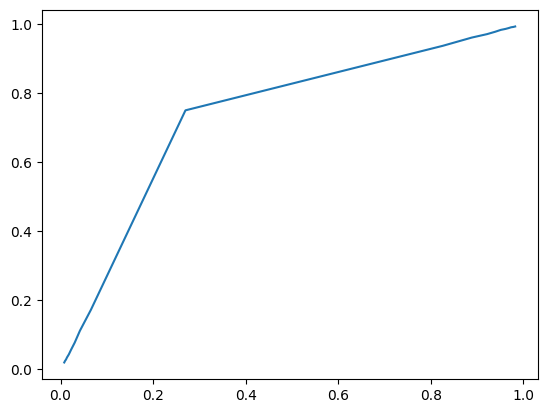

In [62]:
plt.plot(TPR,FPR)

# (ii)

In [63]:
classes = 5

In [64]:
temp = train_data[:,:]
f1 = temp[np.where(temp[:,10]==1)]
f1 = f1[:,3:4]   # as per question taking only one feature for ROC
f1 = np.column_stack((f1,np.ones(f1.shape[0])))
print(f1[:,0].mean())
f2 = temp[np.where(temp[:,10]==2)]
f2 = f2[:,3:4]    # as per question taking only one feature for ROC
f2 = np.column_stack((f2,np.zeros(f2.shape[0])))
print(f2[:,0].mean())

-0.00926194489982542
1.3879458736167734


In [65]:
f = np.row_stack((f1,f2))

In [66]:
TPR, FPR = [], []
for i in range(-6,6):
  TP , FP, TN, FN = 0, 0, 0, 0
  for j in range(f.shape[0]):
    if f[j][0]>i and f[j][1]==1:
      TP=TP+1
    elif f[j][0]>i and f[j][1]==0:
      FP =FP+1
    elif f[j][0]<=i and f[j][1]==0:
      TN = TN+1
    else:
      FN = FN+1
  TPR.append(TP/(TP+FN))
  FPR.append(FP/(FP+TN))

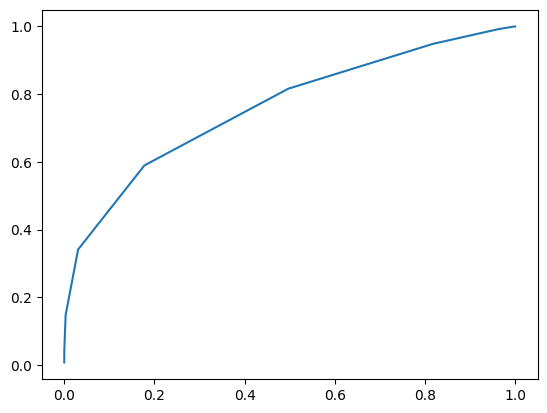

In [67]:
plt.plot(TPR,FPR)